# 📊 Student Performance Predictor
This notebook analyzes student performance based on various factors and builds a machine learning model to predict final grades (G3).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("student-math.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 🔍 Data Preprocessing
Handling missing values, encoding categorical variables, and selecting relevant features.

In [3]:
# Encode categorical features
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [4]:
X = df.drop(columns=['G3'])  # Features
y = df['G3']  # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Model Training & Evaluation
Training models and evaluating their performance.

In [5]:
# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print(f'Linear Regression - MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}')

Linear Regression - MAE: 1.50, MSE: 5.03, R²: 0.75


In [6]:
# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}')

Random Forest - MAE: 1.11, MSE: 3.49, R²: 0.83


## 🎯 Conclusion
- The model predicts student performance based on various factors.
- Random Forest generally performs better than Linear Regression.
- Feature selection and hyperparameter tuning can improve accuracy.

## 🔥 Correlation Heatmap
This heatmap shows how different features correlate with the final grade (G3).

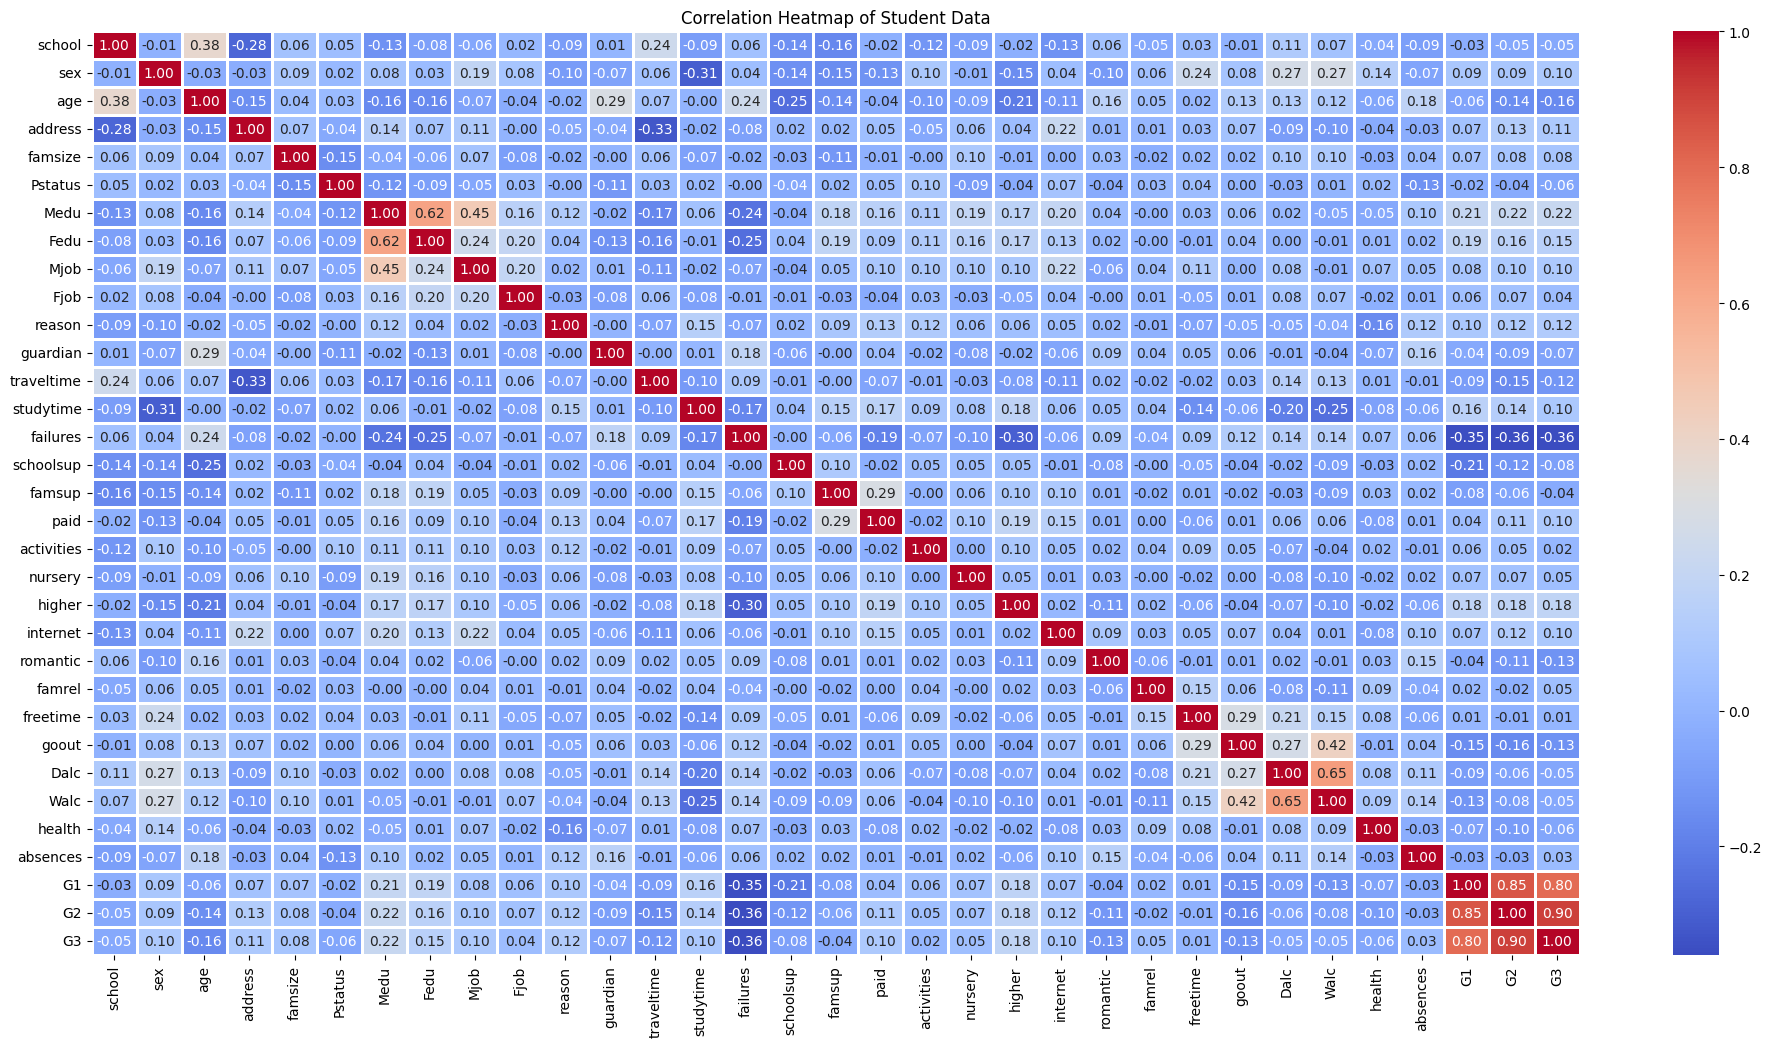

In [7]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.85)
plt.title('Correlation Heatmap of Student Data')
plt.show()

## 🎯 Actual vs. Predicted Grades
Comparing the actual student grades (G3) with the predicted grades.

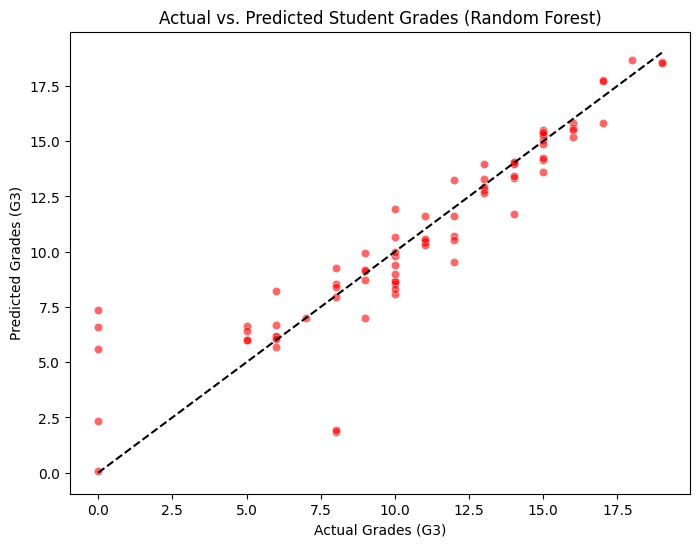

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='red', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')  # Perfect predictions line
plt.xlabel('Actual Grades (G3)')
plt.ylabel('Predicted Grades (G3)')
plt.title('Actual vs. Predicted Student Grades (Random Forest)')
plt.show()

## 📊 Feature Importance (Random Forest)
Shows which features have the most impact on predicting student grades.

C:\Users\dudde\AppData\Local\Temp\ipykernel_3656\1792833648.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='inferno')


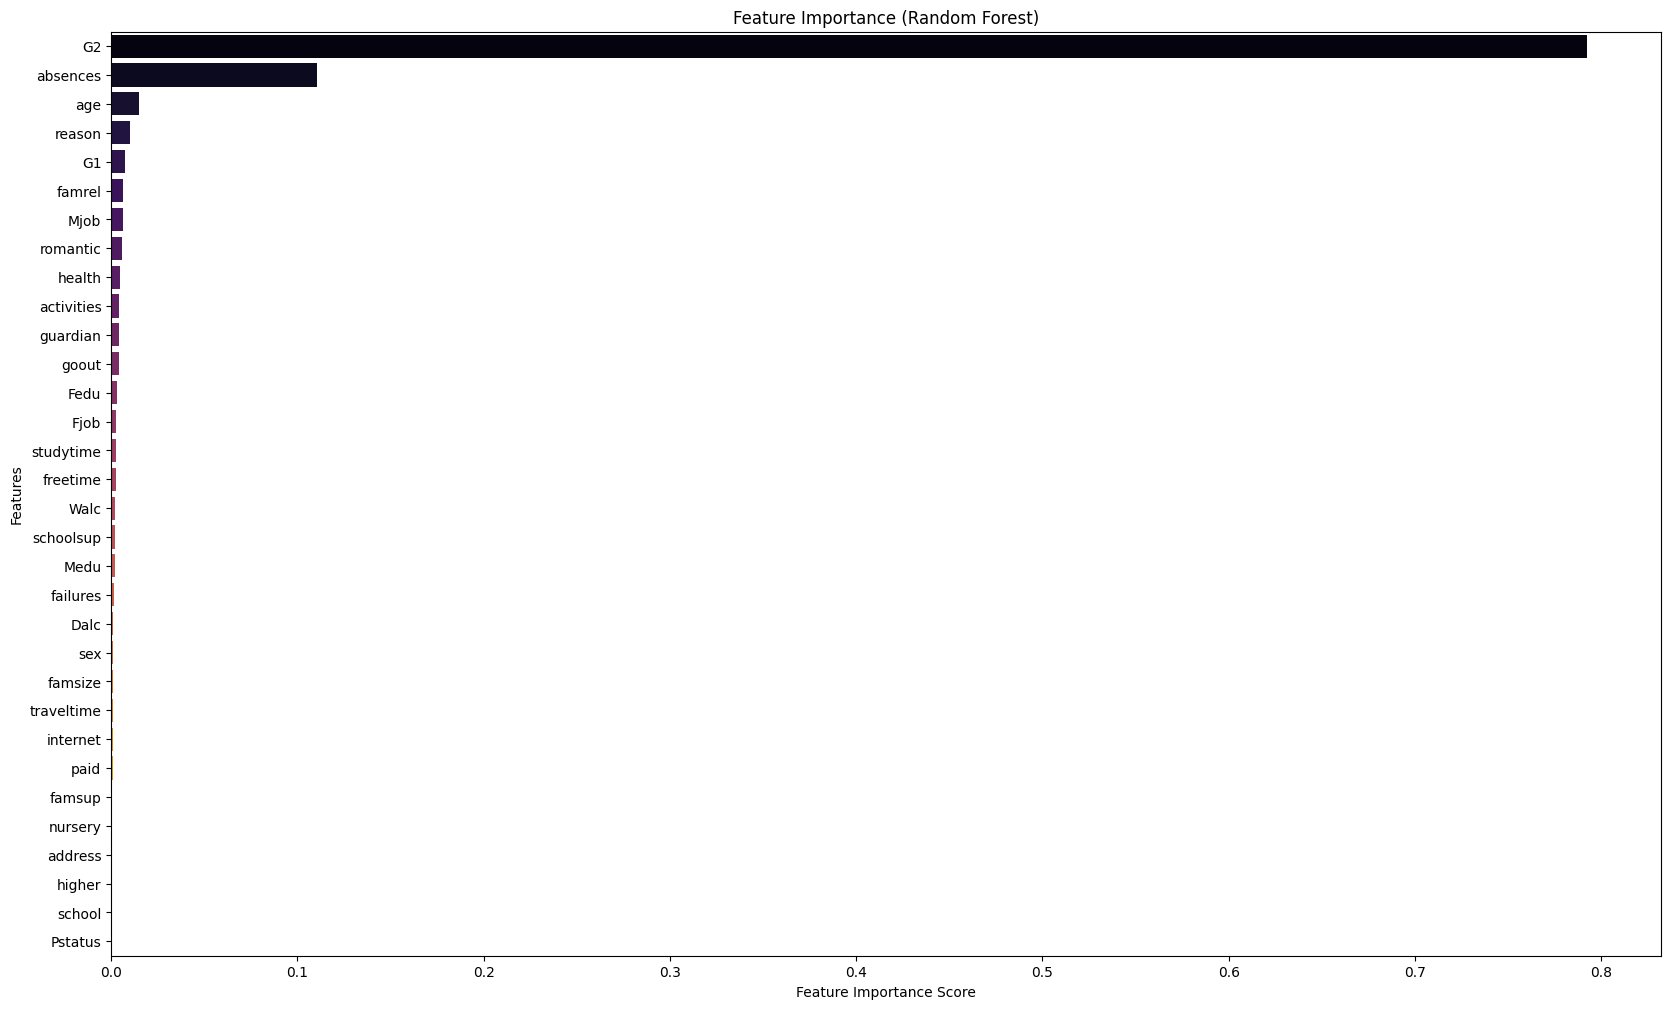

In [9]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(20,12))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='inferno')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [10]:
#Enter student details for prediction:
#Enter value for school: GP
#Enter value for sex: F
#Enter value for age: 17
#Enter value for address: U
#Enter value for famsize: GT3
#Enter value for Pstatus: T
#Enter value for Medu: 4
#Enter value for Fedu: 2
#Enter value for Mjob: teacher
#Enter value for Fjob: other
#Enter value for reason: course
#Enter value for guardian: mother
#Enter value for traveltime: 1
#Enter value for studytime: 2
#Enter value for failures: 0
#Enter value for schoolsup: no
#Enter value for famsup: yes
#Enter value for paid: no
#Enter value for activities: yes
#Enter value for nursery: yes
#Enter value for higher: yes
#Enter value for internet: yes
#Enter value for romantic: no
#Enter value for famrel: 4
#Enter value for freetime: 3
#Enter value for goout: 2
#Enter value for Dalc: 1
#Enter value for Walc: 1
#Enter value for health: 5
#Enter value for absences: 4
#Enter value for G1: 12
#Enter value for G2: 13

In [11]:
#Predicted Final Grade (G3): 13.5


In [12]:

# Function for dynamic user input and prediction
def predict_student_performance():
    import numpy as np

    print("Enter student details for prediction:")
    
    X = df.drop(columns=['G3'])  # Features

    user_data = {}
    for col in X.columns:
        value = input(f"Enter value for {col}: ")
        try:
            user_data[col] = float(value)  # Convert numerical inputs
        except ValueError:
            if col in label_encoders:
                if value in label_encoders[col].classes_:
                    user_data[col] = label_encoders[col].transform([value])[0]
                else:
                    print(f"Invalid input for {col}, defaulting to 0.")
                    user_data[col] = 0
            else:
                print(f"Invalid input for {col}, defaulting to 0.")
                user_data[col] = 0

    # Convert to DataFrame
    user_df = pd.DataFrame([user_data])
    
    # Make prediction
    prediction = rf.predict(user_df)
    print(f"Predicted Final Grade (G3): {prediction[0]:.2f}")

# Run the function to take user input
predict_student_performance()


Enter student details for prediction:
Predicted Final Grade (G3): 13.51


In [ ]:
def dfs(graph,start):
    stack=[start]
    visited=set()
    while stack:
        node=stack.pop()
        if node is not visited:
            print(node,end="")
            visited.add(node)
            stack.extend(reversed(graph[node]))
graph={
                'A': ['B', 'C'],
                'B': ['D', 'E'],
                'C': ['F'],
                'D': [],
                'E': ['F'],
                'F': []
       }
print("DFS traversal of the graph:")
dfs(graph, 'A')